## Machine Learning Exercise 1.

1조 이윤정, 고정훈, 임선진

In [1]:
import numpy as np

%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

In [2]:
# Import IRIS dataset
iris = datasets.load_iris()

### task1: very simple data analysis
* 아래에 슬라이드에 제시된 scatter plot를 구현하세요

### task2: bias-variance tradeoff
 * 아래 코드의 n_neighbor를 수정했을 때의 변화를 나타내고 tradeoff 관점에서 기술하세요.

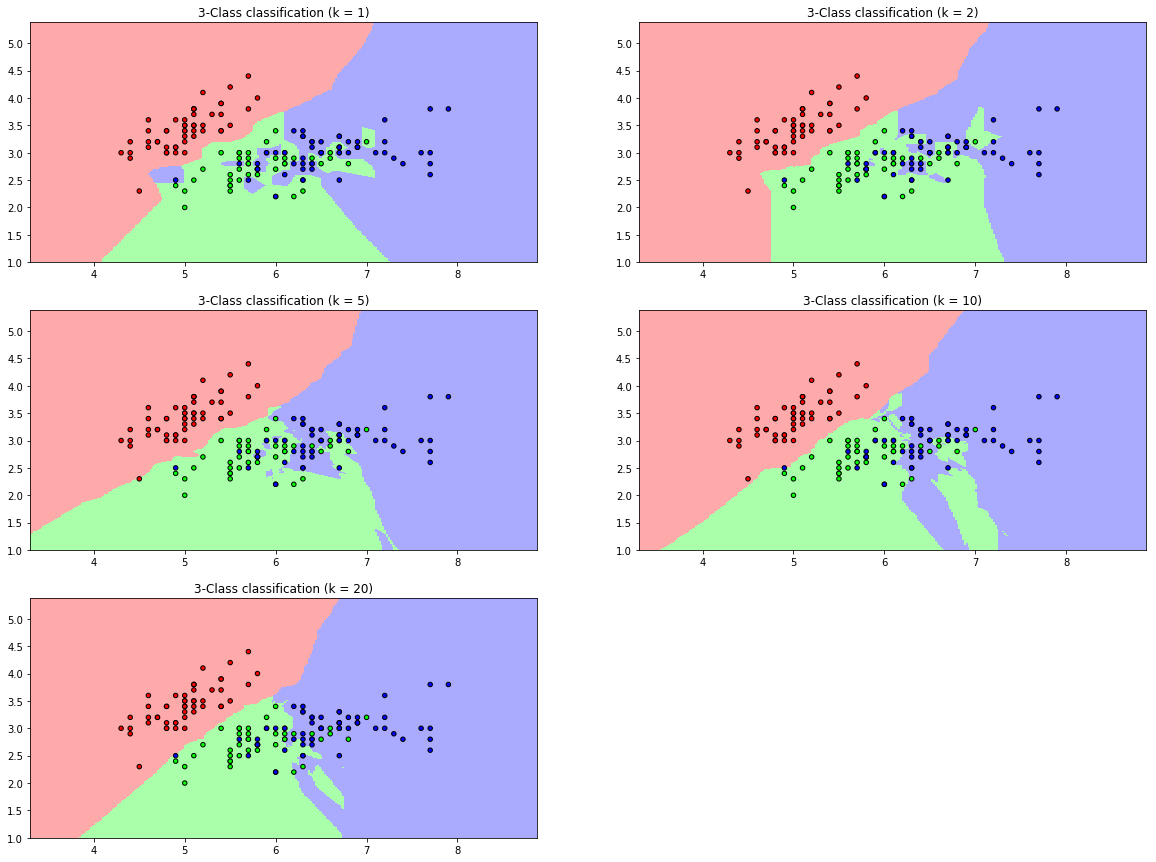

In [3]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


check_neighbors = [1, 2, 5, 10, 20]
plt.figure(1, figsize=(20,15))

for i, n_neighbors in enumerate(check_neighbors):    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(3,2,i+1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()


* n_neighbor를 수정했을 때의 변화를 나타내고 tradeoff 관점에서 기술하세요.

n_neighbor가 1이면 예측시, 1개의 X data만 사용하므로 극단적으로 overfitting된 상태라 할 수 있다. 즉, noise를 전혀 고려하지 않고, 주어진 y data를 그대로 예측한다. 따라서 이 경우 data가 추가될 때 마다 예측치가 변동되므로 variance가 몹시 크다. 이때, n_neighbor를 증가시킨다는 것은, 예측에 사용되는 주변 data의 개수를 증가시키는 것이므로 data가 추가되더라도 예측치의 변동성이 작아진다. 즉, n_neighbor가 증가하면 variance는 작아지게 된다. 
bias는 정답과 모델의 예측값의 차이이다. n_neighbor의 값이 1이면, 정답을 예측치로 제공하므로 주어진 data에 대한 bias는 0이다. n_neighbor가 증가할 수록, 멀리 떨어진 input data의 class를 예측치에 반영하게 되므로, bias는 증가하게 된다. 

요약하자면, n_neighbor가 증가하면 variance는 낮아지고, bias는 증가한다. 즉, n_neighbor의 증가에 따라 bias-variance tradeoff 관계가 성립하는 것이다. 즉, 최적의 k-neighbor는 해당 data에서 bias와 varicance의 합을 최저로 하도록 설정해야 한다. 

### task 3: training-test set split
* 슬라이드에 제시한 그림을 구현하세요

In [4]:
from sklearn.model_selection  import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)
predict_Z = clf.predict(x_test)

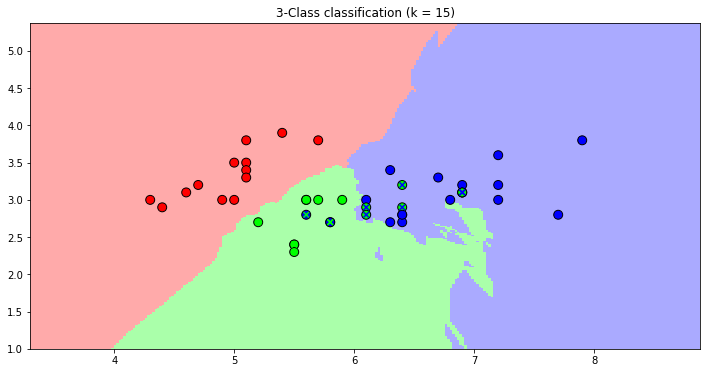

In [6]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(2, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=80)
plt.scatter(x_test[:, 0], x_test[:, 1], c=predict_Z, marker='x', cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

### task 4: overfitting
 * 슬라이드에서 제시한 plot를 구현하고 이 현상을 설명하세요

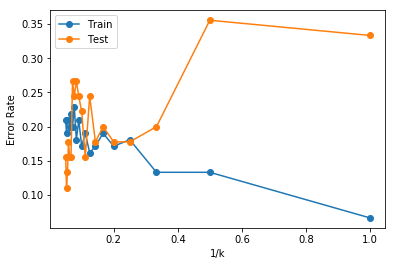

In [7]:
train_errors = []
test_errors = []
check_neighbors = list(range(1, 21))

for n in check_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test) 
    train_errors.append(1 - train_score)
    test_errors.append(1 - test_score)

k_reciprocal = [1/n for n in check_neighbors]
plt.plot(k_reciprocal, train_errors, 'o-')
plt.plot(k_reciprocal, test_errors, 'o-')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.legend(('Train', 'Test'), loc='upper left')
plt.show()

* 위의 그림을 설명

K-Nearest Neighbor 알고리즘에서 k는 주변 데이터 중 몇 개를 참조할지를 결정하는 Hyper-parameter다. k값이 작을수록 local한 정보만 이용하기 때문에 boundary가 복잡해지고, k값이 클수록 boundary는 smooth해진다. 즉 k값이 작을 때 모델의 complexity가 증가한다고 볼 수 있다. 이중 최적의 k를 찾기 위해서는 학습 데이터와 검증(validation) 데이터로 나누어 학습 데이터로 학습한 뒤 학습에 사용하지 않은(unseen) 검증 데이터로 성능을 평가하여 가장 높은 검증 성능(Validation Performance)이 나오는 k 값을 선택하면 된다. 

위 그림은 학습 데이터(Train)와 검증 데이터(Test) 각각에 대해 1/k에 따른 error rate을 그린 것이다. x축의 오른쪽으로 갈수록 k가 작은 값이기 때문에 모델의 complexity가 높아진다. 모델이 높이지면서 학습 데이터(Train)에 대한 error rate는 내려가는 경향을 보임을 확인할 수 있다. 모델의 complexity가 올라갈수록 Bias는 감소하기 때문이다. 그런데 검증 데이터(test)는 모델의 complexity가 큰 영역에서 올라가는 것을 확인할 수 있다. 모델이 복잡해지면서 Bias는 내려가지만 Variance는 더 많이 증가하면서 Overfitting이 발생했기 때문이다. Overfitting은 모델의 복잡도가 지나치게 높아서 학습 데이터에 대해서는 잘 맞추지만 학습에 사용하지 않은 데이터에 대해서는 성능이 떨어지는 현상을 말한다. 

위 데이터에서 k 값이 클 때(위에서 k 최대값은 20) 낮은 Test Error rate을 보인다. 이는 모델의 복잡도를 낮춰(k를 높여) Bias에 대해 손해를 보더라도 Variance를 줄임으로써 더 높은 검증 성능을 획득할 수 있음을 의미한다. 해당 그림에서 Under-fitting 영역이 명확하지 않다. 이는 Under-fitting이 명확할 만큼 큰 k를 사용하지 않았기 때문이다. 만약 k를 더 큰 값을 사용한다면(가령 전체 데이터 수 - 1) Underfitting 영역이 드러나면서 검증 Error rate가 U-shape을 그릴 것이다.